<CENTER><img src="images/logos2.png" style="width:50%"></CENTER>

# Using Python for Physics

After working through the _Introduction to coding in Python_ notebook, you're up-to-speed with coding in Python.  But what good is that?  What can you do by manipulating Python objects, doing simple maths, writing functions and drawing plots?  In this notebook, we'll work through some examples and exercises that show how we can use Python to simulate physics and solve problems.

## Introduction to simulations

### Constant velocity

Suppose you have a cart on a frictionless track.  At time $t$ = 0 s, the cart is at position $x$ = 0 m and is moving with a constant velocity of 0.45 m/s in the $x$-direction.
* Where is the cart at time $t$ = 1.5 s?
* Where is the cart at $t$ = 0.25 s?
* If the cart continues to travel for another 0.25 s beyond $t$ = 0.25 s (for a total of 0.5 s), where is it then?
* How many steps of 0.25 s would you need to calculate in order to determine the position at 1.5 s?
* What if you used a step-size of 0.1 s?

These questions are simple enough to answer on paper.  But we will answer them by simulating the motion of the cart to showcase how a simulation might work.

The simulation is based on this idea:  if you know the postion ($x$ coordinate) of an object at a particular time $t$, and you also know its velocity $v$ at that time, then you can calculate the position a small time $\Delta t$ later according to
\begin{equation}
x_{t + \Delta t} = x_{t} + v\Delta t.
\end{equation}

By considering a series of steps in time and calculating the value of $x$ at each, then we can essentially 'evolve' the motion of the cart through time.  In principle, you can do this calculation for any number of steps.  But beware:  it might take a while if you choose a very large number of steps.

Let's perform this simulation and plot the resulting motion.

In [28]:
import matplotlib.pyplot as plt

x = 0 # Initial position
t = 0 # Initial time
v = 0.45 # The constant velocity
dt = 0.1 # The time-step

# Lists to store the position and time coordinates
X = [x]
T = [t]

# While t < 1.5 s, keep simulating
while t < 1.5:
    # Update the position
    x = x + v * dt
    
    # Update the time
    t += dt
    
    # Record the latest values
    X.append(x)
    T.append(t)
    
# Summarise the state of the cart at the end
print(f'At time t = {t} s, the cart is at x = {x} m')

At time t = 1.5000000000000002 s, the cart is at x = 0.675 m


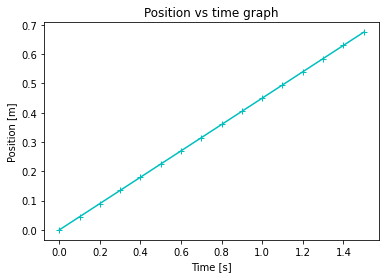

In [29]:
# Plot the position as a function of time
plt.plot(T, X, 'c-+')
plt.title('Position vs time graph')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.show()

#### Exercise

Can you modify the programme to answer the following questions?
* Where will the cart be when $t$ = 2.2 s?
* If the cart has a velocity of 0.62 m/s, where will it be after 2.2 s?
* If the cart has a starting position of $x$ = -0.5 m and a velocity of 0.62 m/s, where will it be at $t$ = 2.2 s?

### Constant acceleration

A frictionless cart starts at $x$ = 0 m with a velocity of 0.45 m/s at time $t$ = 0.  If the cart has a constant acceleration of $a$ = 0.3 m/s<sup>2</sup>, where will it be after 1.5 s?

Let us use the same simulation technique as we used to analyse constant velocity to answer this question.  The only difference here is that, since the cart is now accelerating, its velocity is changed at every step and must be updated accordingly.  The update formula is simply
\begin{equation}
v_{t + \Delta t} = v_{t} + a\Delta t.
\end{equation}

So at each time-step, we can calculate the new velocity based on the cart's acceleration, previous velocity, and the time step.  To update the position, the same update formula as before applies.  But there is a problem!  The velocity is no longer constant &mdash; it is changing under our feet.  So what should we use for the value of the velocity in the position's update formula?  If we use the velocity at the beginning of a step, then the displacement will be underestimated (because the position equation does not know that the cart is accelerating, and thereby traveling further per unit time by the end of the step).  If we use the velocity at the end, we will overestimate the displacement (because the cart at the end of a step is moving further per unit time than it did at the beginning).  We must make a choice here, and either choice incurs an _error_.  We choose to take the velocity at the end.  Therefore here is the order of calculations for each time step:
* Use the velocity-updating formula to find the new velocity
* Use the position update formula (with the new velocity) to find the new position
* Update the time

The code accomplishing this might look like the following.

In [30]:
import matplotlib.pyplot as plt

x = 0 # Initial position
t = 0 # Initial time
v = 0.45 # Initial velocity
a = 0.2 # The constant acceleration
dt = 0.1 # The time-step

# Lists to store the position, time and velocity coordinates
X = [x]
T = [t]
V = [v]

# Simulate up to t = 1.5 s
while t < 1.5:
    v += a * dt
    x += v * dt
    t += dt
    
    # Record the latest values
    X.append(x)
    V.append(v)
    T.append(t)
    
# Summarise the state of the cart at the end in terms of x, v, t
print(f'At time t = {t} s, the cart is at x = {x} m doing v = {v} m/s')

At time t = 1.5000000000000002 s, the cart is at x = 0.9150000000000004 m doing v = 0.7500000000000002 m/s


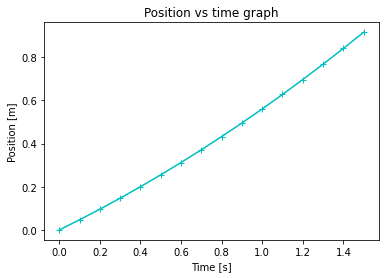

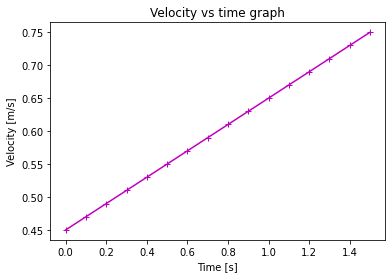

In [31]:
plt.plot(T, X, 'c-+')
plt.title('Position vs time graph')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.show()

plt.plot(T, V, 'm-+')
plt.title('Velocity vs time graph')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.show()

#### Exercise

* What happens if you set the time step to 0.2 s?
* What happens if you set the time step to 0.01 s?
* What if the acceleration is -0.01 m/s<sup>2</sup>?
* If we solve on paper for the position of the cart after 1.5 s under this constant acceleration (using $x = ut + at^2/2$), we get a value of 0.9 m.  Why does this differ slightly from the one we obtained by the simulation above?  How can we get the programme to produce a value closer to the correct value of 0.9 m?
* If the acceleration is -0.02 m/s<sup>2</sup>, how long would it take to stop?  Where would it stop?

## Racing and speeding

Car A starts at $x$ = 0.5 m with a velocity of 0.45 m/s.  Car B starts at $x$ = 0 with a velocity of 0 m/s, but has an acceleration of 0.3 m/s<sup>2</sup>.  When do cars A and B meet?  Where do they meet?  Fill in the blanks in the following programme, or write a programme from scratch, to find out.

In [7]:
# Initial coordinates of car A
x_A = 0.5
v_A = 0.45

# Initial coordinates of car B
x_B = 0.
v_B = 0.
a_B = 0.2

# Common time variables
t = 0
dt = 0.01  #step size

# Lists to store displacements
X_A = [x_A]
X_B = [x_B]
T = [t]

# While the cars are yet to meet
while condition:
    # Update variables at each time step
    # . . .
    
    X_A.append(x_A)
    X_B.append(x_B)
    T.append(t)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(T, X_A)
plt.plot(T, X_B)
plt.title('Position vs time graph')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.show()

Suppose you are a police officer in a stationary car.  Another car speeds past you at a constant speed of 40 m/s.  It takes you 3 s to pull out and then you accelerate to catch the speeder.  The police car has a constant acceleration of 6 m/s<sup>2</sup> and maximum speed of 60 m/s.  How long before you catch the car and how far have you travelled by that time?

In [ ]:
# Police car variables
x_p = 0
v_p = 0
v_p_max = 60
a_p = 6

# The time it takes for the police to start
t_delay = 3

# Speeder variables
x_s = 0
v_s = 40

# Common time parameters
t = 0
dt = 0.1

# Lists for storing displacements
X_p = [x_p]
X_s = [x_s]
T = [t]

# While the police car is yet to catch the speeder
while xxxx:
    
    # If the police car is moving after the delay
    if t > t_delay:
        # Update the police car's velocity
        # . . .
        
        # Check that new speed is not greater than top speed
        if v_p > v_p_max:
            # Limit the police car's speed to v_p_max
            # . . .
        
        # Update police car position
        # . . .
        
    # Update speeder position
    # . . .
    
    t += dt
    X_p.append(x_p)
    X_s.append(x_s)
    T.append(t)
        
    # Impose stopping condition
    if xxxxx:
        print('Police car has caught up with the speeder after')
        print('Time:', t, 's')
        print('Traveling:', x_p, 'm')
        
        # End the simulation
        break

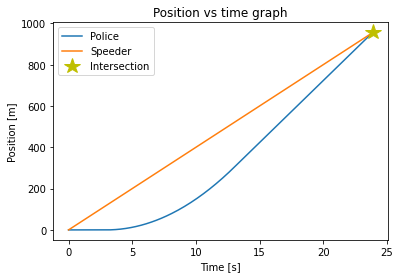

In [33]:
# Plot the result
import matplotlib.pyplot as plt

plt.title('Position vs time graph')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.plot(T, X_p, label='Police')
plt.plot(T, X_s, label='Speeder')
plt.plot(t, x_p, 'y*', markersize=16, label='Intersection')
plt.legend()
plt.show()

## Exercise:  Projectile Motion

Now we have mastered motion in one dimension, let us progress to two.  Suppose an object is launched with an initial velocity $v_0$ at an angle $\theta$ above the horizontal as shown in [Figure 1](#projectile_motion).  Due to gravity, the projectile experiences constant acceleration downward but none in the horizontal direction.  Therefore, we can separate its horizontal and vertical components of velocity into $v_x = v \cos{\theta}$ and $v_y = v \sin{\theta}$, respectively.  (Take the trigonometric functions $\sin$ and $\cos$ from the numpy library by doing `from numpy import sin, cos`.)

Write a programme to find the $x$ distance travelled by a 10 kg projectile fired at 15 m/s at 45$^\circ$ above the horizontal from a point 2 m above the ground.  This recipe might help:
* Set the initial conditons of the projectile
* Make a loop over time steps
* In the loop, update the velocity of the projectile (only its $y$-coordinate changes)
* Update the $(x, y)$-position of the ball
* Update the time


<figure id="projectile_motion">
    <center>
        <img src="images/projectile_motion.png" alt="Projectile motion" width="600px">
        <figcaption>Figure 1: Diagram of the projectile motion problem.</figcaption>
    </center>
</figure>


#### Follow-up question
What initial angle, $\theta$, gives the largest displacement when the projectile is not fired from ground level?

## Exercise:  Falling with Air Resistance

We now know enough about programming in Python to solve problems that would be very difficult without it.  Imagine a cannonball falling straight down from a great height.  The resultant force in the downward direction is $F = mg - Cv^2$, where $C$ is a constant that depends on the aerodynamic properties of the ball, the ball's surface area, and the density of air.  The force acting on the ball here depends on the ball's velocity!

1.  A 20 kg cannonball is dropped from a height of 100 m.  It has a terminal velocity of 100 m/s.  Write a programme to calculate the time taken for the ball to hit the ground.  You will have to calculate $C$ first.
2.  The same cannonball is now fired at 700 m/s at 45$^\circ$ aboe the horizontal.  Calculate the difference in distance travelled when you include air resistance.
    Here, you must account for the changing direction of the air resistance.  Because the air resistance always works against the direction of travel, there is a trick:  write the force due to air resistance as $\vec{F} = -Cv\vec{v}$.

## Exercise:  Mass on a Spring

* A ball with a mass of 0.1 kg is connected to a spring.
* The spring has a spring constant $k$ of 10 N/m.
* The force on the ball is $F = -kx$, where $x$ is the displacement from equilibrium of the ball.
* The ball starts at rest at $x$ = 0.1 m.

Simulate this system and plot the position of the ball as a function of time!  The exact solution is
\begin{equation}
    x = x_0 \cos{\omega t},
\end{equation}
where $\omega = \sqrt{k / m}$.  Describe any discrepancies that you find between your results and this description.  What causes them?  Are they physical?

#### Conservation of energy check...

The total energy of this system must be constant!  In terms of the kinetic and potential parts, it may be expressed as
\begin{equation}
    E = \frac{1}{2}m v^2 + \frac{1}{2}k x^2.
\end{equation}
By checking if this quantity indeed remains constant over various timescales of the simulation, we can evaluate one aspect of the performance of our programme.  Investigate the impact of updating position before velocity in the simulation.  Look over a single time-step and see if the total energy remains constant in both cases.

### Variations on the theme

**Vertical spring.**  Repeat this exercise with a spring oriented vertically instead of horizontally, such that the mass feels the force of gravity in addition to the force of the spring.  Do this for a number of initial positions.

**With damping.**  In the case where the spring lies horizontally, consider adding a damping term to the force such that the total force becomes $\vec{F} = -k\vec{x} - C\vec{v}$.  Experiment with what happens for different values of $C$.

**With a driving force.**  Finally, consider adding a driving force of the form $F = A_0 \sin{\omega_0 t}$.  See what happens as the frequency $\omega_0$ varies.